## Objective: Examine why its customers have left in the past and which features are more important to determine who will churn in the future.

### 1. Set up environment and import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Exploratory Data Analysis
In this section, the followings will be done:
- Looking for missing values
- See if there is any outliers
- Distribution of Churning Rate due to different features
- Remove unused columns

#### Looking for missing values

In [3]:
# Look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges is default in object type, so we need to change it back to float type.

In [4]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We remove all 11 rows with missing values in TotalCharges

In [7]:
df.dropna(inplace=True)

In [8]:
df.reset_index(inplace=True,drop=True)

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
# Look for Outliers
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

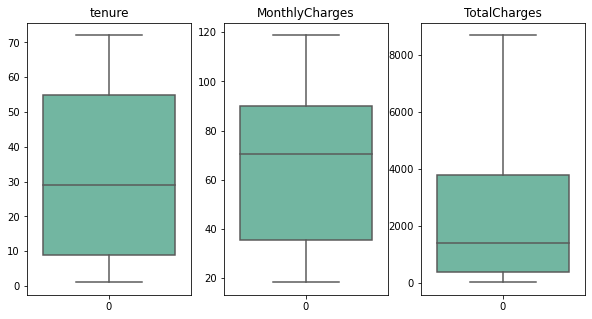

In [12]:
num_features = ['tenure','MonthlyCharges','TotalCharges']
fig, axes = plt.subplots(1,3,figsize=(10,5))
for i in num_features:
    sns.boxplot(ax=axes[num_features.index(i)],data=df[i],palette='Set2').set_title(i)
    
    

#### Look for Outliers

To check for outliers, we define outliers as beyond the range of +/-1.5 IQR and see if there is any datas lying beyond the range

In [13]:
# Create a function to find outlier
def iqr_outliers(num_features):
    outlier_position=[]
    for i in num_features:
        q1 = df[num_features].quantile(0.25)[i]
        q3 = df[num_features].quantile(0.75)[i]
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        for j in df[i]:
            if j > Upper_tail or j < Lower_tail:
                outlier_position.append(i)
    print("Outliers:",outlier_position)
iqr_outliers(num_features)

Outliers: []


It shows that no outliers in our dataset.

#### Remove unused column

In [14]:
# Remove unused column
df.drop(columns='customerID',inplace=True)

#### Distribution of Churning Rate

([<matplotlib.patches.Wedge at 0x1fa578d4940>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'No'),
  Text(0.7383051242403964, -0.8154174044747714, 'Yes')],
 [Text(-0.40271188594930735, 0.44477312971351146, '73.4%'),
  Text(0.40271188594930707, -0.44477312971351163, '26.6%')])

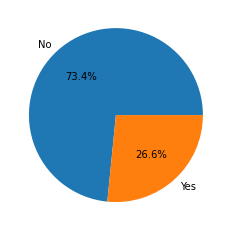

In [15]:
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].unique(),autopct='%1.1f%%')

From the pie chart above, the ratio of churning rate (yes/no) is nearly 3:1, if we use the data for training directly, our model will predict customer will not churn due to the dominating data of not churning. To deal with such imbalance data set, data augmentation skills has to be used. I will demonstrate undersampling in the data preprocessing part of this project.

In [16]:
category_features = df.loc[:, ~df.columns.isin(num_features)]
category_features

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7028,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7029,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7030,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
def plot_categoricals(columns, title):
    fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
    fig.set_size_inches(15, 45)

    row = col = 0
    for column in columns:
        plot_title = '{}: {}'.format(title, column)
        sns.countplot(x=column, hue="Churn", data=category_features, ax=axs[row][col]).set_title(plot_title)

        if col == 1:
          col = 0
          row += 1
        else:
          col += 1

    # this prevents plots from overlapping
    plt.tight_layout()

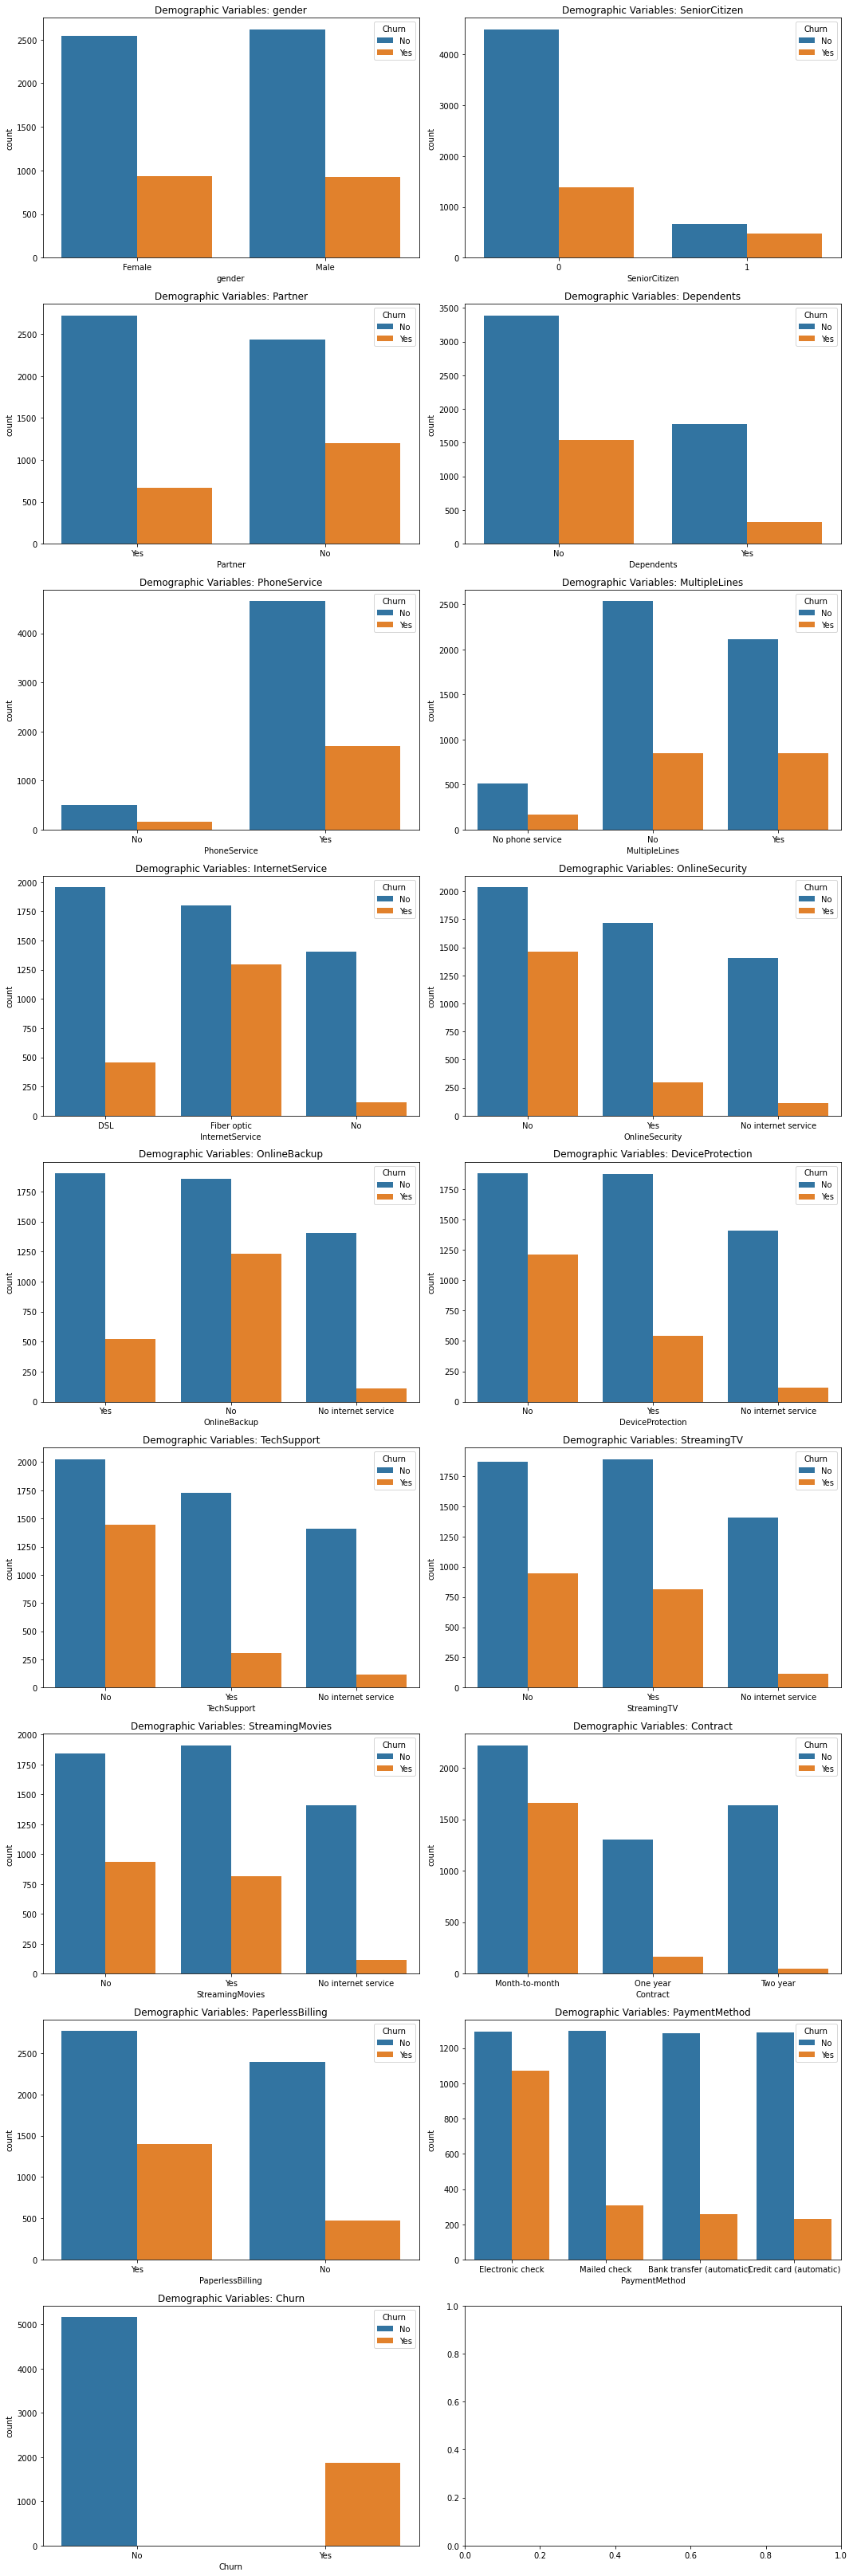

In [18]:
plot_categoricals(category_features.columns.to_list(), 'Demographic Variables')


From the plot, we can have some insights:
- Overall, it is an highly imbalanced data
- The ratio of churning rate is more or less the same on each gender, so gender is not considered to be an important factor
- Internet Service: there are relatively more people having fiber optic internet service. At the same time, the ratio of churning rate is much higher in this category. 
- Onliine Security: there are relatively more people not acquiring online security service. At the same time, the ratio of churning rate is much higher in this category. 
- Online Backup: there are relatively more people not having online backup serviece. Again, the ratio of churning rate is much higher in this category.
- Tech Support: there are relatively more people not having tech support serviece. Again, the ratio of churning rate is much higher in this category.
- Contract: most of people using telco service are based on month-to-month contract. The ratio of churning rate is much higher in this category.
- Payment Method: most of people using telco service are using electronic check to pay. The ratio of churning rate is much higher in this category.
- Among the observations in differnent factors, we can conclude there may be some reasons relating to the follow-up services such as the poor service of fibre optic etc pushing people to churn. We may investigate more to see if there are some groups of people having similar pattern and give advice to specific cluster for the sake of pulling them back.

### 3. Data Preprocessing
In this section, the followings will be done:
- Feature Scaling
- Encoding
- Dealing with imbalanced dataset

#### Feature Scaling

Among all features, we have three numerical features: tenure, MonthlyCharges, TotalCharges. From the boxplots shown above, as they have vast difference in range of values, we will adopt min-max scaler to limit their range from 0 to 1

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,0.323944,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.662189,0.227521,No
7028,Female,0,Yes,Yes,1.000000,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0.845274,0.847461,No
7029,Female,0,Yes,Yes,0.140845,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.112935,0.037809,No
7030,Male,1,Yes,No,0.042254,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.558706,0.033210,Yes


In [22]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

#### Encoding

In this case, we will use one-hot encoding for those categorical features with multiple labels

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df['gender'] = df['gender'].replace({'Male':1,'Female':0})
df['Partner'] = df['Partner'].replace({'Yes':1,'No':0})
df['Dependents'] = df['Dependents'].replace({'Yes':1,'No':0})
df['PhoneService'] = df['PhoneService'].replace({'Yes':1,'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes':1,'No':0})
df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})

In [25]:
categorical_features = [
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity',
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV',
    'StreamingMovies', 
    'Contract',
    'PaymentMethod'
]

In [26]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(drop='first')
encoded_df =onehotencoder.fit_transform(df[categorical_features]).toarray()

In [27]:
encoded_df

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [28]:
encoded_df = pd.DataFrame(encoded_df, columns=onehotencoder.get_feature_names(categorical_features))
encoded_df

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
df = pd.concat([df,encoded_df],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,No phone service,DSL,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.464789,1,No,DSL,Yes,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0.014085,1,No,DSL,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.619718,0,No phone service,DSL,Yes,No,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.014085,1,No,Fiber optic,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,0.323944,1,Yes,DSL,Yes,No,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7028,0,0,1,1,1.000000,1,Yes,Fiber optic,No,Yes,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7029,0,0,1,1,0.140845,0,No phone service,DSL,Yes,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,1,1,0,0.042254,1,Yes,Fiber optic,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
df.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
InternetService                          0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
Contract                                 0
PaperlessBilling                         0
PaymentMethod                            0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetSer

In [31]:
df2 = df.drop(categorical_features,axis=1)
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,0.323944,1,1,0.662189,0.227521,0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7028,0,0,1,1,1.000000,1,1,0.845274,0.847461,0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7029,0,0,1,1,0.140845,0,1,0.112935,0.037809,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,1,1,0,0.042254,1,1,0.558706,0.033210,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

#### Dealing with imblanced dataset

In this case, we will use undersampling to reduce the data as long as the churing ratio of yes to no is 50:50

In [34]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
y = df2['Churn'] # target
X = df2.drop(columns='Churn') # all features

In [36]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [37]:
print(X_resampled.shape)
print(y_resampled.shape)

(3738, 30)
(3738,)


To confirm our dataset is balance, we plot a pie chart for illustration

([<matplotlib.patches.Wedge at 0x1fa589b3100>,
 [Text(6.735557395310444e-17, 1.1, '1'),
  Text(-2.0206672185931328e-16, -1.1, '0')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

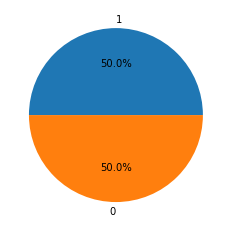

In [38]:
plt.pie(y_resampled.value_counts(),labels=y_resampled.value_counts().index,autopct='%1.1f%%')

### 4. Model Training

In this section, the followings will be done:
- Train-test Split

For the classification model, we will use machine learning algorithms listed as follows:
- Logistic Regression
- Random Forest
- KNN
- XGBoost

To evaluate their performance, we will focus on the recall score and try to minimum the false negative (we predict customers not going to churn but they actually churn)

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Train-test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=41)
print('Train data stroke count')
display(y_train.value_counts())
print('Test data stroke count')
display(y_test.value_counts())

Train data stroke count


1    1339
0    1277
Name: Churn, dtype: int64

Test data stroke count


0    592
1    530
Name: Churn, dtype: int64

#### Logistic Regression

In [41]:
# GridSearchCV
log_clf = Pipeline([
#    ( 'column-onehot', col_trans ),
    ( 'classifier', LogisticRegression() )
])
hyperparams = { 
    'classifier__C': np.linspace(0.0001, 0.01, 50),
    'classifier__max_iter': range(80, 111)
}

log_search = GridSearchCV(log_clf,  hyperparams, n_jobs = -1,cv=5, verbose=1)
log_search.fit(X_train, y_train)
y_pred = log_search.predict(X_test)
print("Best params", log_search.best_params_)
print("Best score", log_search.best_score_)
log_C = log_search.best_params_['classifier__C']
log_max_iter = log_search.best_params_['classifier__max_iter']
# print(classification_report(y_test, y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print([tp,fp])
# print([fn,tn])
# log_score = recall_score(y_test,y_pred)
# print('recall score: {}'.format(log_score))

Fitting 5 folds for each of 1550 candidates, totalling 7750 fits
Best params {'classifier__C': 0.00979795918367347, 'classifier__max_iter': 80}
Best score 0.7507677375096697


#### Random Forest

In [42]:
forest_clf = Pipeline([
    ( 'classifier', RandomForestClassifier() )
])
hyperparams = { 
    'classifier__n_estimators': [100,200],
    'classifier__max_depth': [2,6,8,10],
    'classifier__max_leaf_nodes': [10,20,30,40,50,60,70,80,90100]

}

forest_search = GridSearchCV(forest_clf,  hyperparams, n_jobs = -1,cv=5,verbose=1)
forest_search.fit(X_train, y_train)
y_pred = forest_search.predict(X_test)
print("Best params", forest_search.best_params_)
print("Best score", forest_search.best_score_)
forest_n_estimators = forest_search.best_params_['classifier__n_estimators']
forest_max_depth = forest_search.best_params_['classifier__max_depth']
forest_max_leaf_nodes = forest_search.best_params_['classifier__max_leaf_nodes']

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params {'classifier__max_depth': 10, 'classifier__max_leaf_nodes': 80, 'classifier__n_estimators': 200}
Best score 0.765671478405558


#### KNN

In [43]:
knn_clf = Pipeline([
    ( 'classifier', KNeighborsClassifier() )
])
hyperparams = { 
    'classifier__n_neighbors': np.arange(1,100,2),
    'classifier__weights': ['distance']
}

knn_search = GridSearchCV(knn_clf,  hyperparams, n_jobs = -1)
knn_search.fit(X_train, y_train)
y_pred = knn_search.predict(X_test)
print("Best params", knn_search.best_params_)
print("Best score", knn_search.best_score_)
n_neighbors = knn_search.best_params_['classifier__n_neighbors']
knn_weights = knn_search.best_params_['classifier__weights']

Best params {'classifier__n_neighbors': 65, 'classifier__weights': 'distance'}
Best score 0.7243888021251441


#### XGBoost

In [44]:
import xgboost as xgb

In [135]:
xgb_clf = Pipeline([
    ( 'classifier', xgb.XGBClassifier(
        booster='gbtree',
        learning_rate=0.3,
        base_score=0.5,
        colsample_bylevel=1, 
        colsample_bytree=1, 
        gamma=0,
        reg_alpha=0,
        random_state=40
        
    ) 
    )
])
hyperparams = { 
    'classifier__n_estimators': np.arange(500,800,50),
    'classifier__max_depth':[2,6,8,10],
    
}

xgb_search = GridSearchCV(xgb_clf,  hyperparams, n_jobs = -1,cv=5,verbose=2)
xgb_search.fit(X_train, y_train)
y_pred = xgb_search.predict(X_test)
print("Best params", xgb_search.best_params_)
print("Best score", xgb_search.best_score_)
xgb_n_estimators = xgb_search.best_params_['classifier__n_estimators']
xgb_max_depth = xgb_search.best_params_['classifier__max_depth']

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\toddp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params {'classifier__max_depth': 2, 'classifier__n_estimators': 500}
Best score 0.7301256695809555


In [136]:
algorithm = ['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','XGBClassifier']
hyperparameters = [
    LogisticRegression(
        C = log_C, 
        max_iter=log_max_iter
    ), 
    KNeighborsClassifier(
        n_neighbors = n_neighbors, 
        weights = knn_weights
    ),
    RandomForestClassifier(
        n_estimators = forest_n_estimators,
        max_depth = forest_max_depth,
        max_leaf_nodes = forest_max_leaf_nodes
    ),
    xgb.XGBRFClassifier(
        n_estimators = xgb_n_estimators,
        max_depth = xgb_max_depth
    )
]

In [137]:
models=dict(zip(algorithm,hyperparameters))
print(models)

{'LogisticRegression': LogisticRegression(C=0.00979795918367347, max_iter=80), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=65, weights='distance'), 'RandomForestClassifier': RandomForestClassifier(max_depth=10, max_leaf_nodes=80, n_estimators=200), 'XGBClassifier': XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bytree=None, gamma=None, gpu_id=None,
                importance_type='gain', interaction_constraints=None,
                max_delta_step=None, max_depth=2, min_child_weight=None,
                missing=nan, monotone_constraints=None, n_estimators=500,
                n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', random_state=None, reg_alpha=None,
                scale_pos_weight=None, tree_method=None,
                validate_parameters=None, verbosity=None)}


LogisticRegression 0.7593582887700535
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       592
           1       0.71      0.82      0.76       530

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.77      0.76      0.76      1122

[434, 174]
[96, 418]


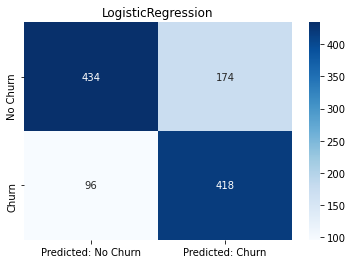

<Figure size 720x360 with 0 Axes>

KNeighborsClassifier 0.7263814616755794
              precision    recall  f1-score   support

           0       0.85      0.58      0.69       592
           1       0.66      0.89      0.75       530

    accuracy                           0.73      1122
   macro avg       0.75      0.73      0.72      1122
weighted avg       0.76      0.73      0.72      1122

[470, 247]
[60, 345]


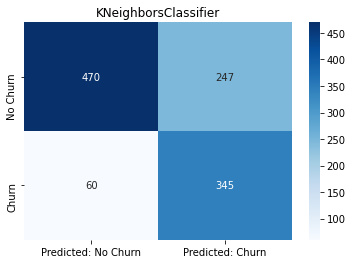

<Figure size 720x360 with 0 Axes>

RandomForestClassifier 0.7780748663101604
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       592
           1       0.74      0.83      0.78       530

    accuracy                           0.78      1122
   macro avg       0.78      0.78      0.78      1122
weighted avg       0.78      0.78      0.78      1122

[439, 158]
[91, 434]


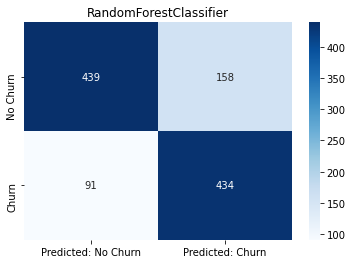

<Figure size 720x360 with 0 Axes>

C:\Users\toddp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier 0.7789661319073083
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       592
           1       0.73      0.83      0.78       530

    accuracy                           0.78      1122
   macro avg       0.78      0.78      0.78      1122
weighted avg       0.78      0.78      0.78      1122

[441, 159]
[89, 433]


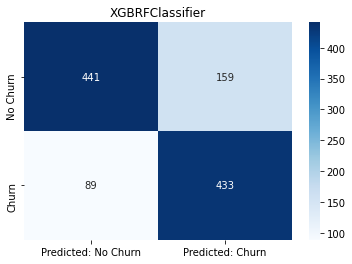

<Figure size 720x360 with 0 Axes>

In [66]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
acc_score_list =[]
recall_score_list=[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_score_list.append(acc)
    recall_score_list.append(recall)
    print(name,acc)
    print(classification_report(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print([tp,fp])
    print([fn,tn])
    ax = plt.axes()
    ax.set_title(name)
    plt.figure(figsize=(10,5))
    cm_data = [tp, fp], [fn, tn]
    conf_matrix = pd.DataFrame(data=cm_data,columns=['Predicted: No Churn','Predicted: Churn'],index=['No Churn','Churn'])
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues",ax=ax)
    plt.show()



[0.7593582887700535, 0.7263814616755794, 0.7780748663101604, 0.7789661319073083]
[0.8188679245283019, 0.8867924528301887, 0.8283018867924529, 0.8320754716981132]


Text(0.5, 1.0, 'Model Recall Score')

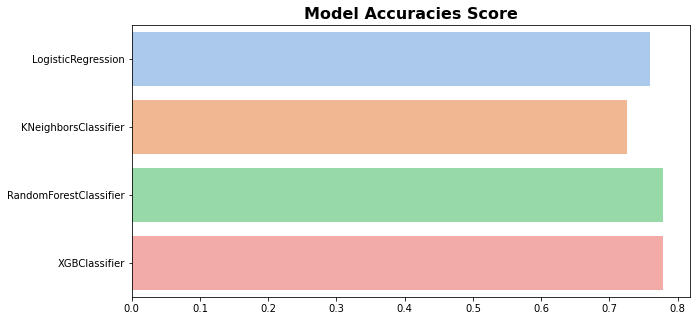

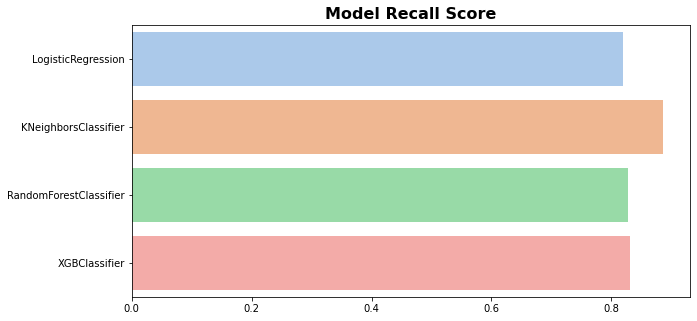

In [138]:
print(acc_score_list)
plt.figure(figsize = (10,5))
sns.barplot(x = acc_score_list, y = algorithm , palette='pastel')
plt.title("Model Accuracies Score", fontsize=16, fontweight="bold")

print(recall_score_list)
plt.figure(figsize = (10,5))
sns.barplot(x = recall_score_list, y = algorithm , palette='pastel')
plt.title("Model Recall Score", fontsize=16, fontweight="bold")

As shown above, KNN did the best job among four ML models.

### 5. Feature Importance evaluation

To go further, we are going to investigate on each feature importance to see which features have great influence on the prediction and remove the rest of them

In [139]:
model = KNeighborsClassifier(
        n_neighbors = 65, 
        weights = 'distance',
    )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       592
           1       0.66      0.89      0.75       530

    accuracy                           0.73      1122
   macro avg       0.75      0.73      0.72      1122
weighted avg       0.76      0.73      0.72      1122

[470, 247]
[60, 345]


In [140]:
from sklearn.inspection import permutation_importance
importance = permutation_importance(model, X_train, y_train, scoring='recall')


In [141]:
importance_score = importance['importances_mean'].tolist()
feature = X_train.columns.values.tolist()
feature_importance = {'Features':feature,'Score':importance_score}

In [142]:
feature_importance_df = pd.DataFrame(feature_importance)
feature_importance_df.sort_values('Score',ascending=False,inplace=True)

In [143]:
feature_importance_df['Features'].reset_index(drop=True)

0                            MonthlyCharges
1                                    tenure
2                              TotalCharges
3               InternetService_Fiber optic
4                       StreamingMovies_Yes
5                         MultipleLines_Yes
6                                   Partner
7                           StreamingTV_Yes
8                                    gender
9                          OnlineBackup_Yes
10      StreamingMovies_No internet service
11          StreamingTV_No internet service
12          TechSupport_No internet service
13     DeviceProtection_No internet service
14         OnlineBackup_No internet service
15       OnlineSecurity_No internet service
16                       InternetService_No
17                         PaperlessBilling
18                               Dependents
19           PaymentMethod_Electronic check
20                       OnlineSecurity_Yes
21                     DeviceProtection_Yes
22                          Tech

In [144]:
feature_importance_df

,Features,Score
7,MonthlyCharges,0.098133
4,tenure,0.096938
8,TotalCharges,0.079014
11,InternetService_Fiber optic,0.074085
24,StreamingMovies_Yes,0.068559
10,MultipleLines_Yes,0.065422
2,Partner,0.065273
22,StreamingTV_Yes,0.064974
0,gender,0.064227
16,OnlineBackup_Yes,0.055116


The top 10 important features affecting the recall score are:
1. Monthly Charges
2. Tenure
3. Total Charges
4. InternetService_Fiber optic
5. StreamingMovies_Yes
6. MultipleLines_Yes
7. Partner
8. StreamingTV_Yes
9. gender
10. OnlineBackup_Yes

### 6. Recommendation

#### In view of the top 10 features, Telco Company could review their service in three aspects:

#### 1. Service Charges
Whether they fine tune the price or offer discounts/bundle_price in a long term contract

#### 2. Connection Stability of Service
They should review the connection stability of internet service espically for users connecting via optic fibre.

#### 3. Choice of Streaming Channel
Reviewing the selection/choices of both Streaming TV and Movies seems to be one of the directions to think of. They may also give special offers to those in pairs having lower price to watch Streaming TV/Movies.